In [1]:
from util import setup_notebook
setup_notebook()
%load_ext autoreload
%autoreload 2

In [2]:
import re
import altair as alt
import pandas as pd
from testmining import apfd
from testmining.util import find_files

In [4]:
base_dir = '../output/square@okhttp/matrix-window-size'
file_regex = re.compile('square-okhttp-matrix-(\d+).csv')
files = find_files(base_dir, file_regex, converter=int)

            
df = pd.DataFrame(files, columns=['windowSize', 'filename']).sort_values(by='windowSize').reset_index(drop=True)
df['apfd'] = df['filename'].apply(apfd.file_apfd)
df

,windowSize,filename,apfd
0,0,../output/square@okhttp/matrix-window-size/squ...,0.539178
1,20,../output/square@okhttp/matrix-window-size/squ...,0.862637
2,40,../output/square@okhttp/matrix-window-size/squ...,0.862637
3,60,../output/square@okhttp/matrix-window-size/squ...,0.843750
4,80,../output/square@okhttp/matrix-window-size/squ...,0.837551
5,100,../output/square@okhttp/matrix-window-size/squ...,0.822163
6,120,../output/square@okhttp/matrix-window-size/squ...,0.818567
7,140,../output/square@okhttp/matrix-window-size/squ...,0.808378
8,160,../output/square@okhttp/matrix-window-size/squ...,0.817518
9,180,../output/square@okhttp/matrix-window-size/squ...,0.817527


In [5]:
df['apfd'].idxmax()

1

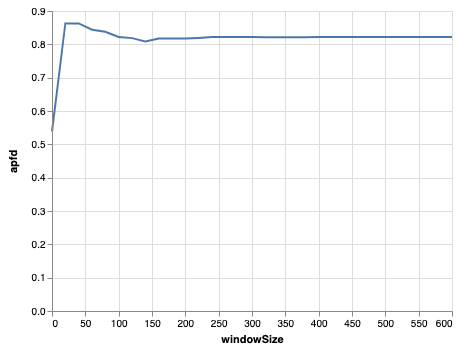

In [6]:
alt.Chart(df).mark_line().encode(
  x=alt.X('windowSize'),
  y=alt.Y('apfd'),
)